In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/college_financials.csv', header=0)

In [3]:
yr4 = df.query('sector in (1,2,3)')
len(yr4)

34233

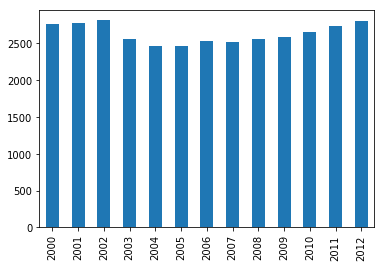

In [4]:
pd.value_counts(yr4['academic_year']).sort_index().plot.bar()

In [5]:
yr4['namecity'] = yr4['inst_name'] + yr4['city'] + yr4['state']
schoolrecords = pd.value_counts(yr4['namecity'])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


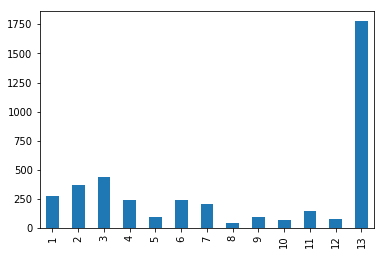

In [6]:
pd.value_counts(schoolrecords).sort_index().plot.bar()

In [14]:
joined = yr4.join(schoolrecords, on='namecity', lsuffix='yr4', rsuffix='cnt')

In [15]:
final_df = joined[joined['namecitycnt'] == 13].drop('namecitycnt', axis=1)

In [17]:
for c in final_df.columns:
    if final_df[c].dtype in (object, np.int64):
        print('skipping {}'.format(c))
        continue
    final_df['{}_prev'.format(c)] = final_df.groupby('namecityyr4')[c].shift(1)
    final_df['{}_change'.format(c)] = (final_df[c] - final_df['{}_prev'.format(c)]) / final_df['{}_prev'.format(c)]

skipping academic_year
skipping inst_name
skipping tcs_name
skipping city
skipping state
skipping zipcode
skipping sector
skipping namecityyr4


In [19]:
final_df[final_df['inst_name'] == 'Stanford University']

,academic_year,inst_name,tcs_name,city,state,zipcode,sector,cpi_index,cpi_scalar_2012,hepi_index,...,total_liabilities_prev,total_liabilities_change,total_net_assets_prev,total_net_assets_change,total_faculty_all_prev,total_faculty_all_change,all_employees_prev,all_employees_change,ft_faculty_salary_prev,ft_faculty_salary_change
25103,2000,Stanford University,Stanford University,Stanford,CA,94305,2,169.300,0.743963,196.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25104,2001,Stanford University,Stanford University,Stanford,CA,94305,2,175.100,0.769450,208.7,...,2.302814e+09,0.086574,1.171847e+10,-0.048721,1719.0,NaN,8234.0,NaN,102258.49400,NaN
25105,2002,Stanford University,Stanford University,Stanford,CA,94305,2,178.200,0.783073,212.7,...,2.502178e+09,-0.113732,1.114753e+10,-0.051652,NaN,NaN,NaN,NaN,NaN,NaN
25106,2003,Stanford University,Stanford University,Stanford,CA,94305,2,182.100,0.800211,223.5,...,2.217600e+09,0.405317,1.057174e+10,0.092644,2491.0,NaN,9396.0,NaN,111189.80280,0.049736
25107,2004,Stanford University,Stanford University,Stanford,CA,94305,2,186.100,0.817788,231.7,...,3.116430e+09,-0.036725,1.155115e+10,0.132408,NaN,NaN,NaN,NaN,116719.97500,0.039454
25108,2005,Stanford University,Stanford University,Stanford,CA,94305,2,191.700,0.842397,240.8,...,3.001980e+09,0.099694,1.308061e+10,0.202578,4249.0,NaN,12035.0,NaN,121325.01240,-0.181950
25109,2006,Stanford University,Stanford University,Stanford,CA,94305,2,199.000,0.874475,253.1,...,3.301259e+09,0.032201,1.573045e+10,0.169760,NaN,NaN,NaN,NaN,99249.93168,0.062309
25110,2007,Stanford University,Stanford University,Stanford,CA,94305,2,204.138,0.897054,260.3,...,3.407562e+09,0.153377,1.840085e+10,0.193284,7213.0,NaN,14754.0,NaN,105434.06570,0.024110
25111,2008,Stanford University,Stanford University,Stanford,CA,94305,2,211.702,0.930292,273.2,...,3.930203e+09,0.021065,2.195743e+10,0.033392,NaN,NaN,NaN,NaN,107976.06420,0.125217
25112,2009,Stanford University,Stanford University,Stanford,CA,94305,2,214.658,0.943282,279.3,...,4.012993e+09,0.154378,2.269063e+10,-0.205000,7438.0,NaN,15730.0,NaN,121496.52920,-0.004398


In [20]:
final_df.to_csv('data/college_financials_only4yr_only13.csv')

skipping academic_year
skipping inst_name
skipping tcs_name
skipping city
skipping state
skipping zipcode
skipping sector


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


skipping namecityyr4
skipping cpi_index_prev
skipping cpi_index_change
skipping cpi_scalar_2012_prev
skipping cpi_scalar_2012_change
skipping hepi_index_prev
skipping hepi_index_change
skipping hepi_scalar_2012_prev
skipping hepi_scalar_2012_change
skipping heca_index_prev
skipping heca_index_change
skipping heca_scalar_2012_prev
skipping heca_scalar_2012_change
skipping gross_tuition_fees_rev_prev
skipping gross_tuition_fees_rev_change
skipping net_tuition_fees_rev_prev
skipping net_tuition_fees_rev_change
skipping rev_fed_grant_prev
skipping rev_fed_grant_change
skipping rev_state_grant_prev
skipping rev_state_grant_change
skipping rev_local_grant_prev
skipping rev_local_grant_change
skipping rev_state_local_grant_contract_prev
skipping rev_state_local_grant_contract_change
skipping rev_fedapp_grant_contract_prev
skipping rev_fedapp_grant_contract_change
skipping investment_prev
skipping investment_change
skipping total_rev_prev
skipping total_rev_change
skipping grant01_prev
skippin

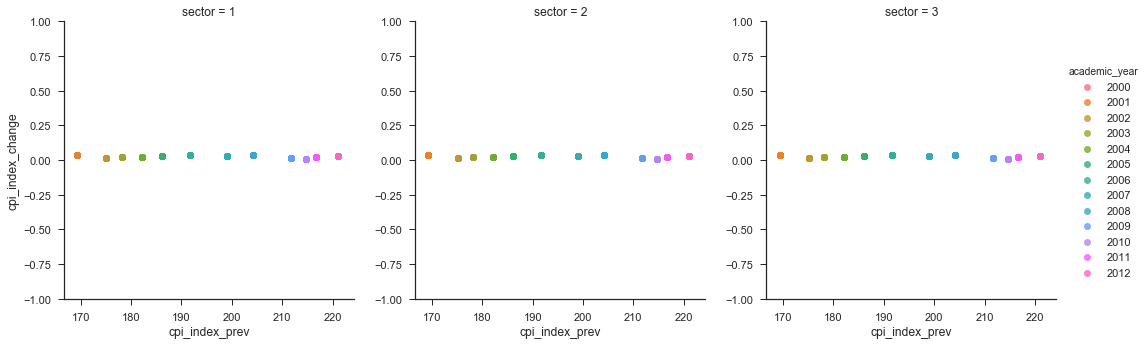

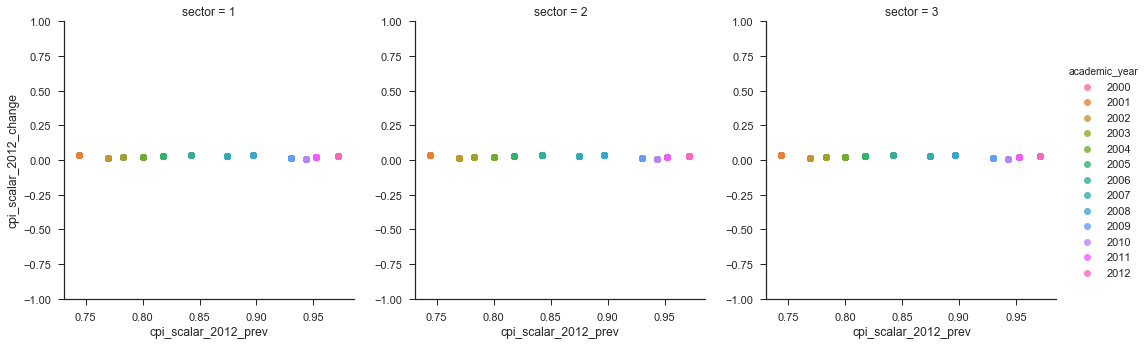

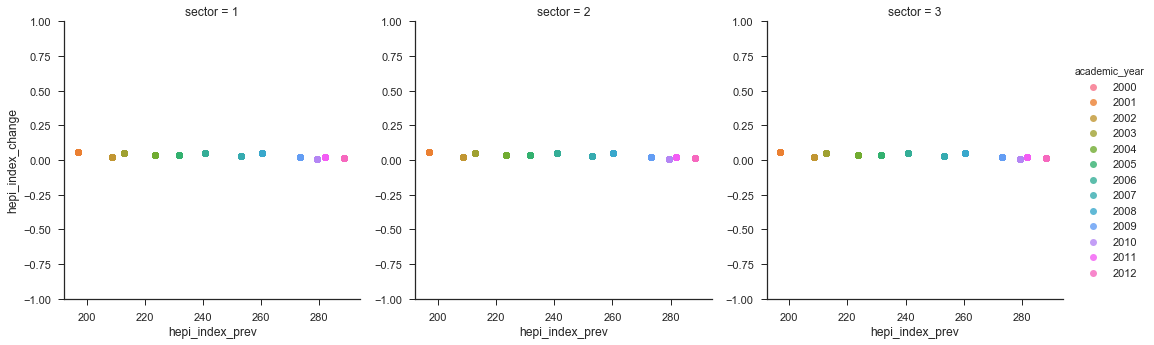

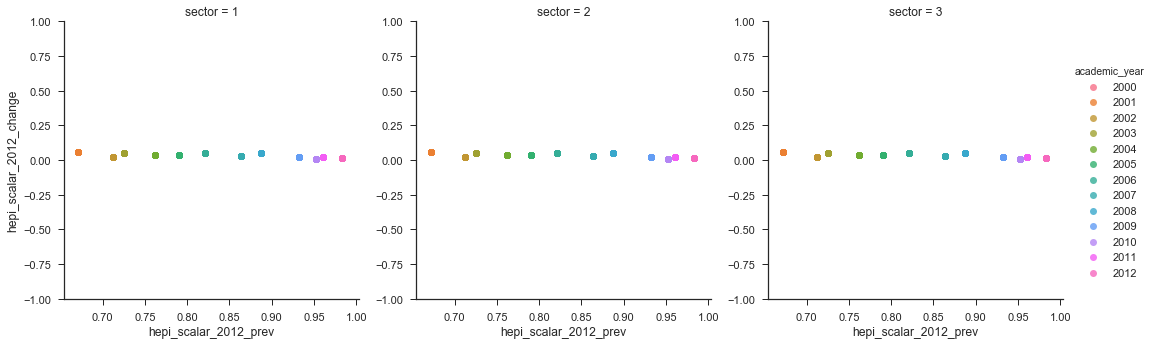

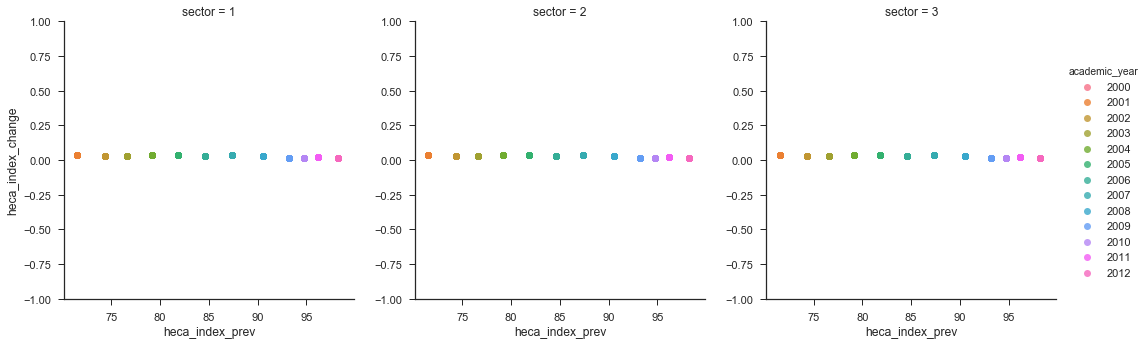

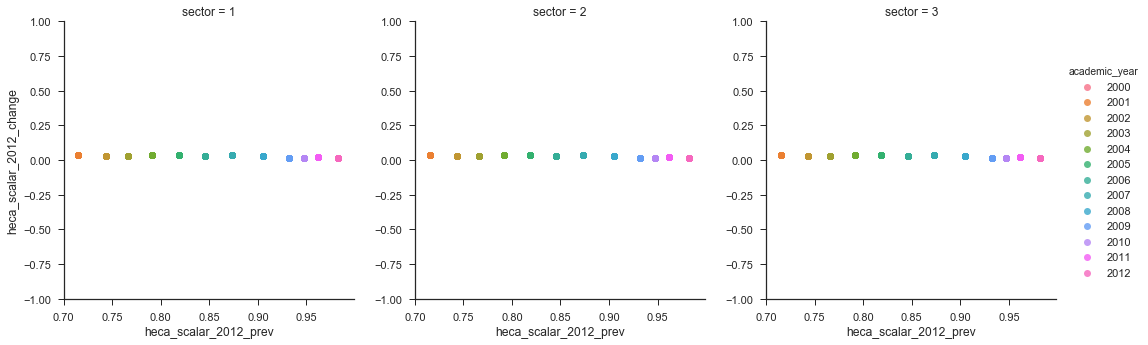

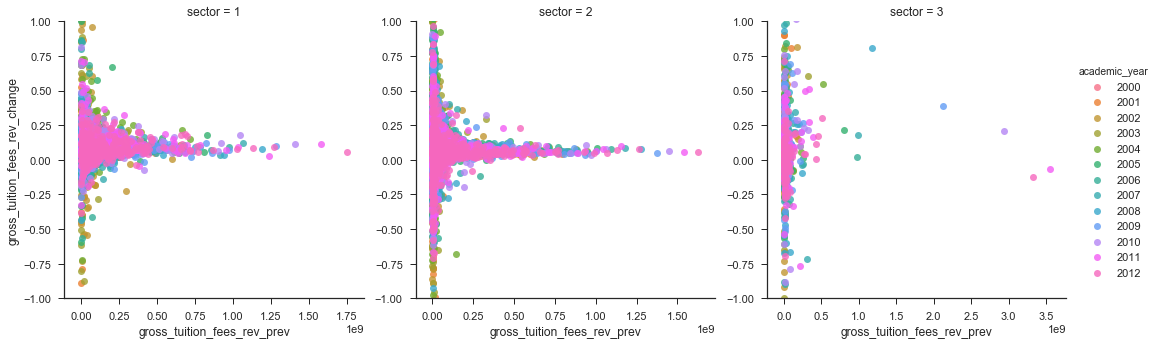

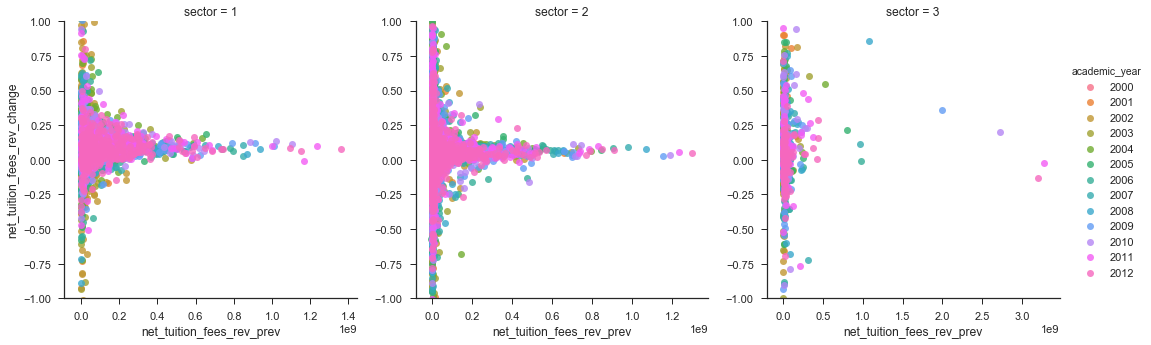

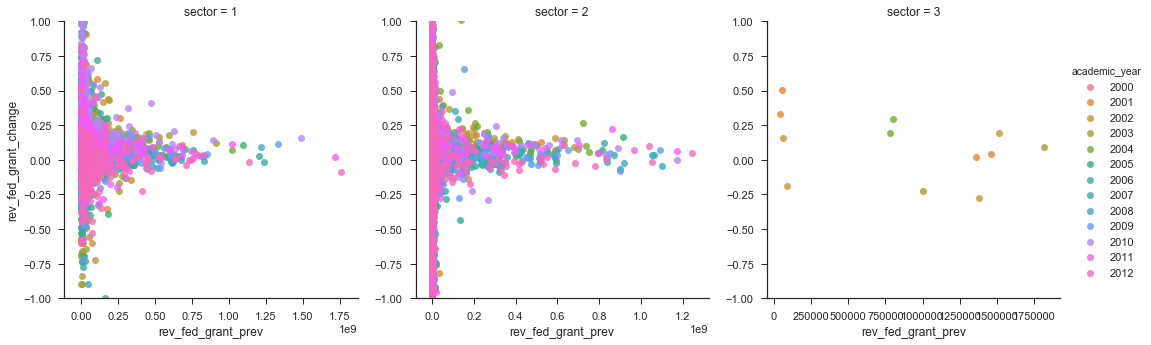

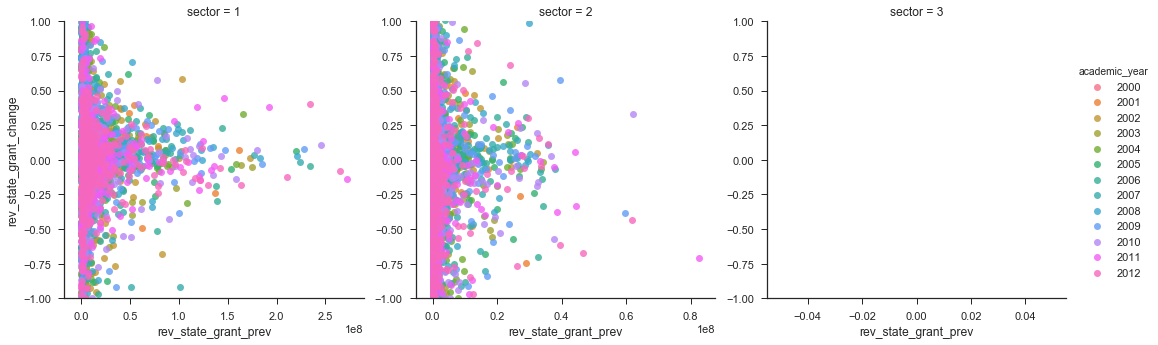

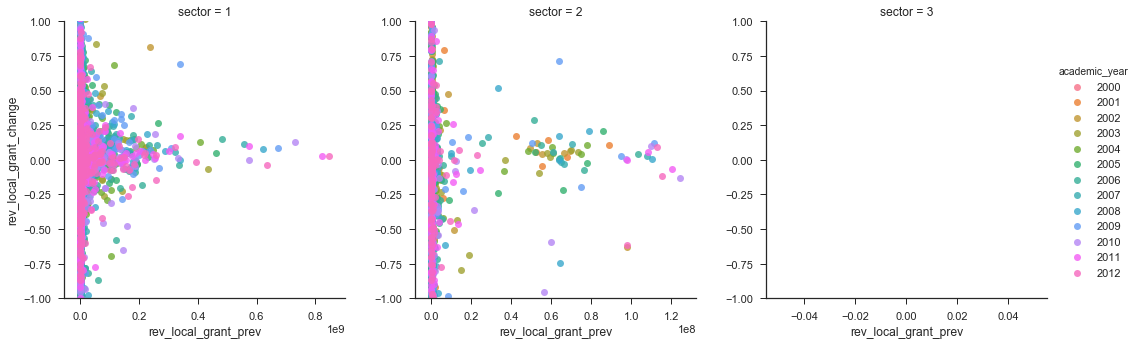

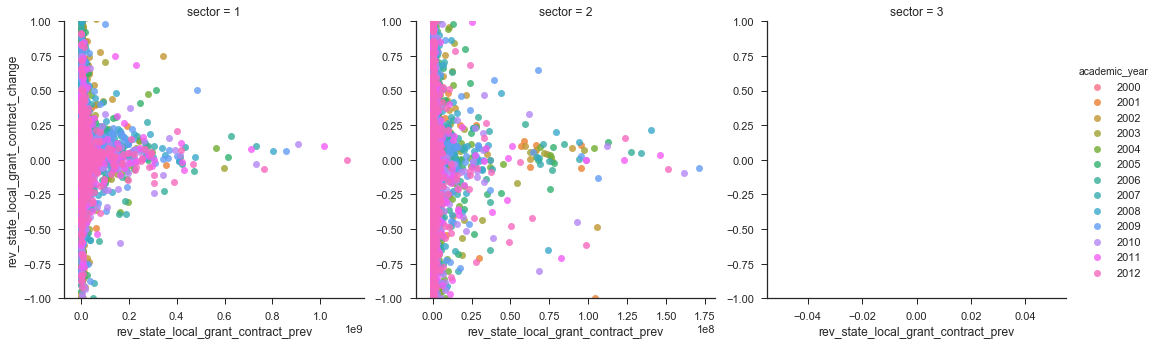

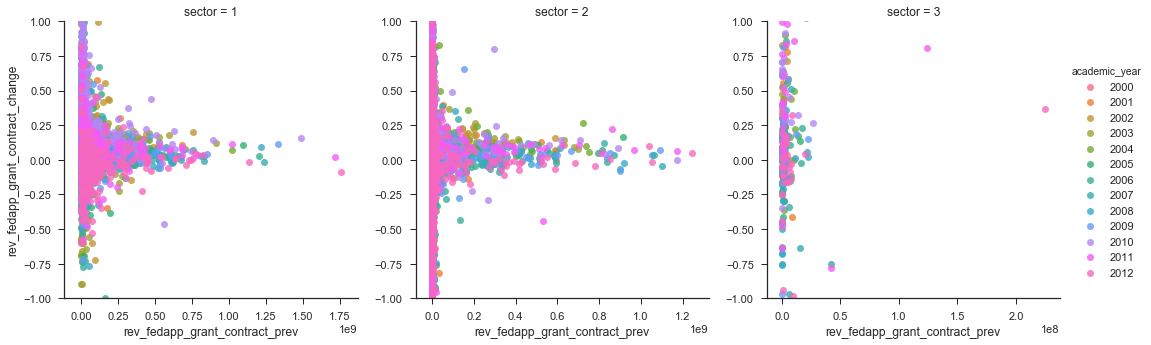

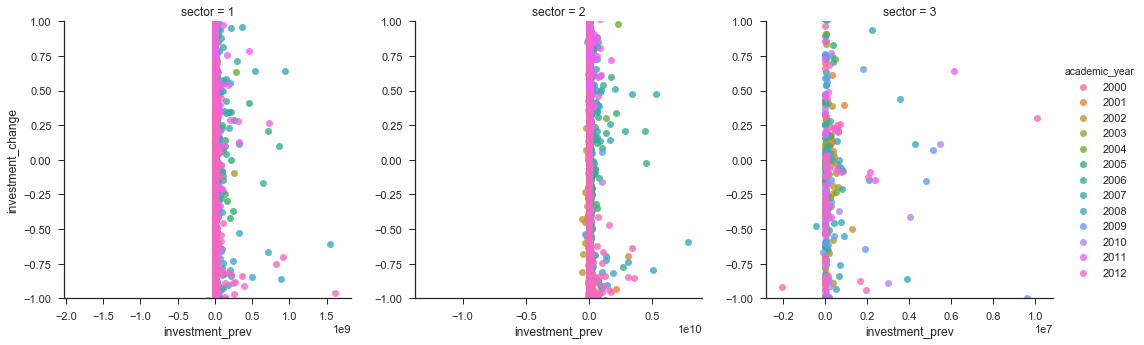

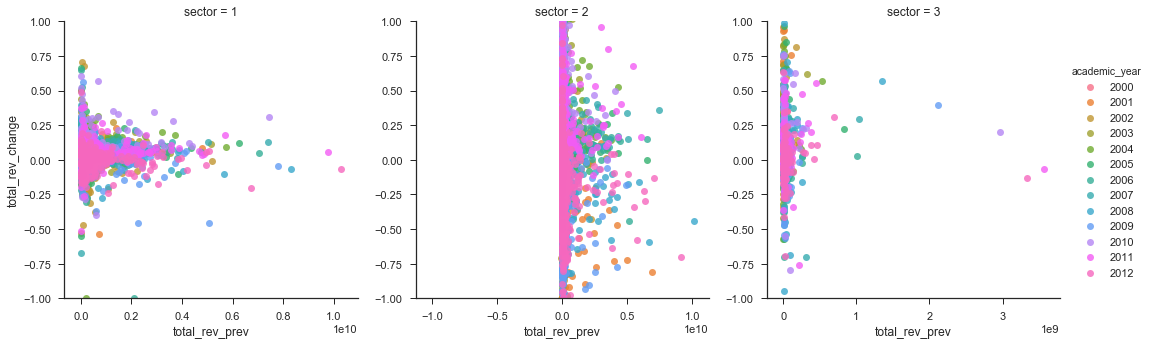

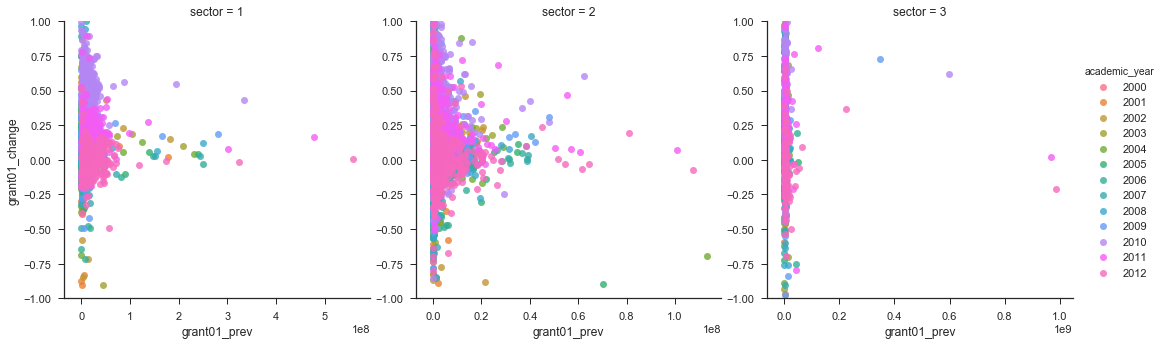

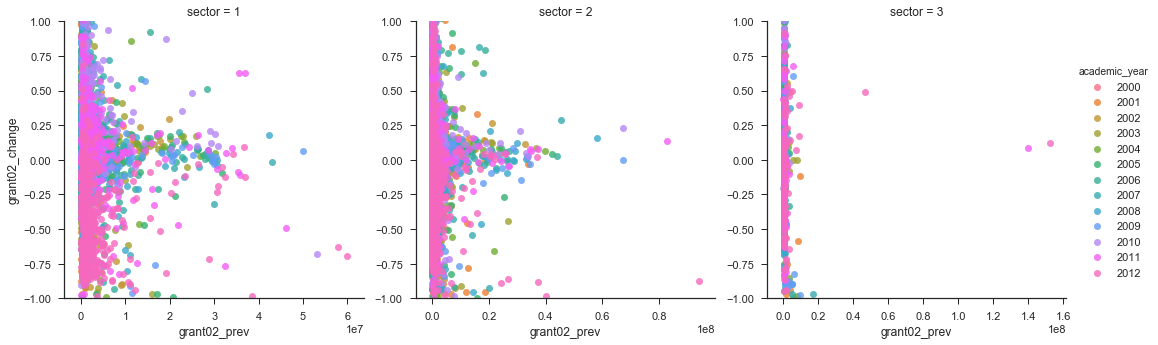

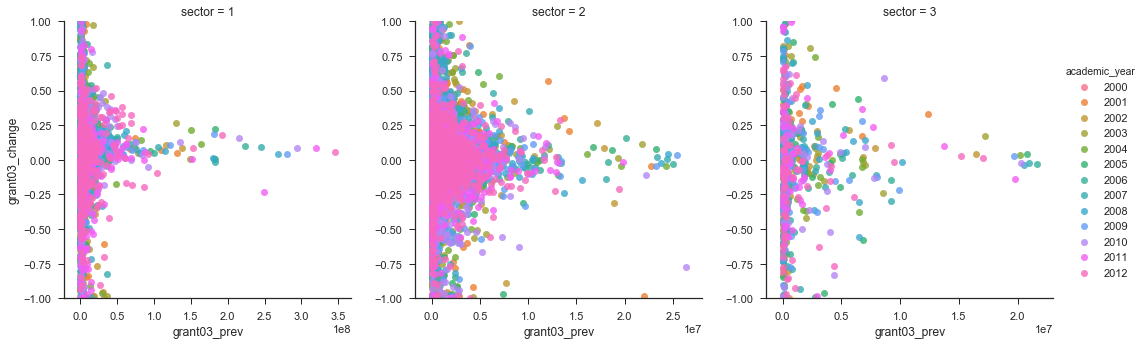

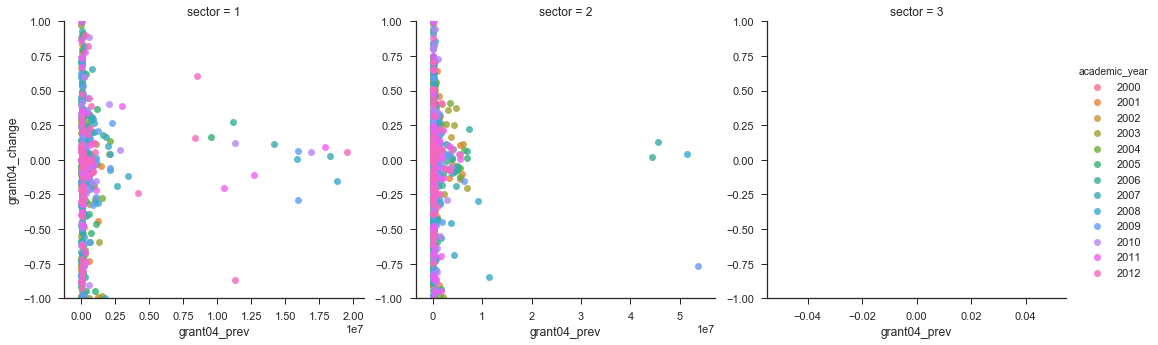

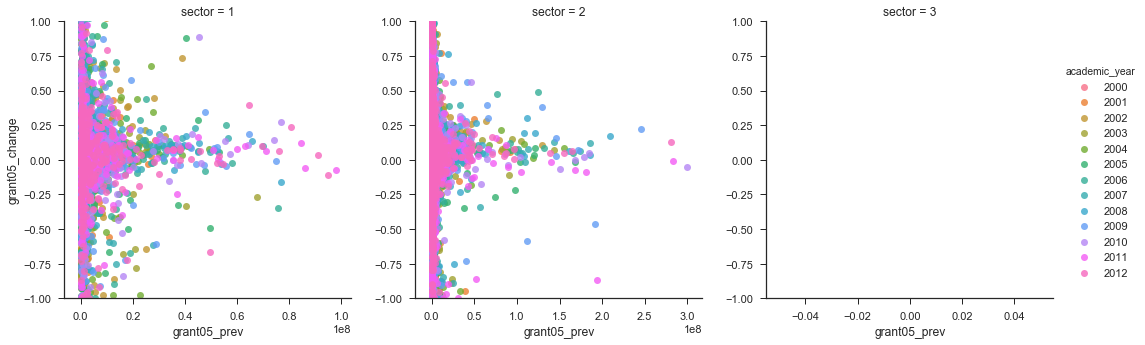

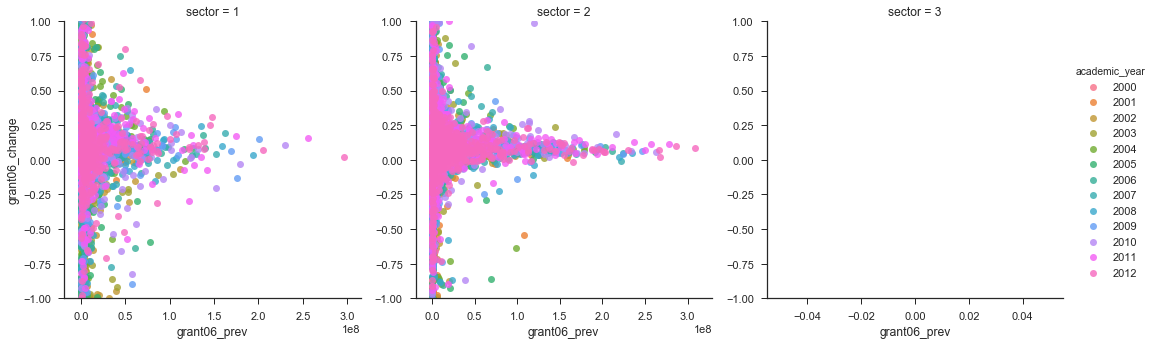

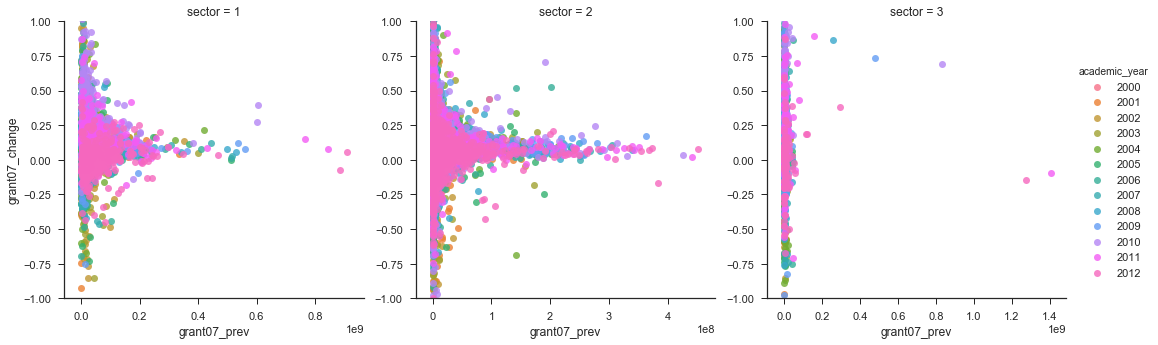

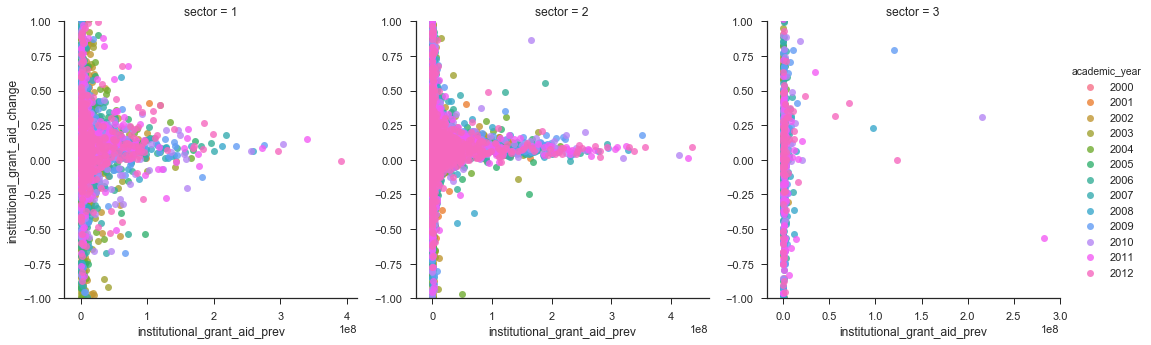

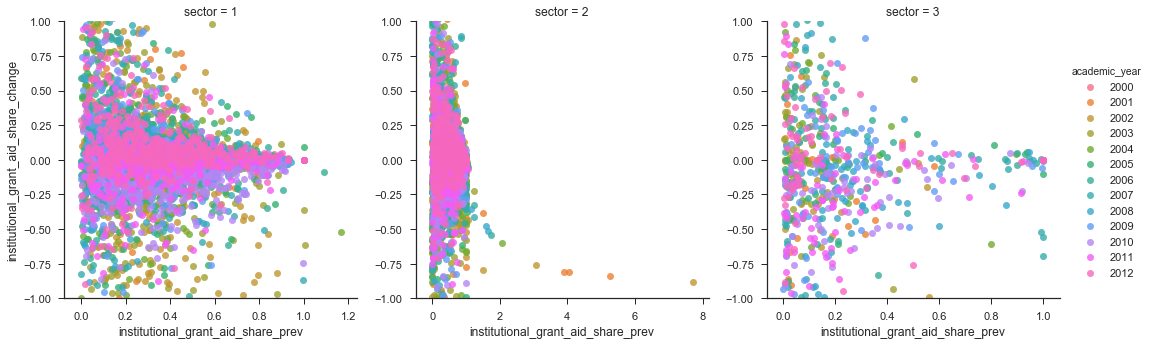

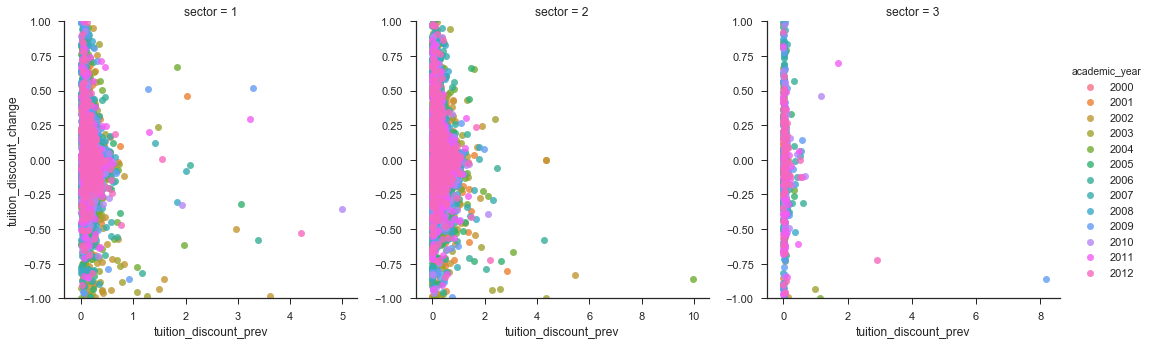

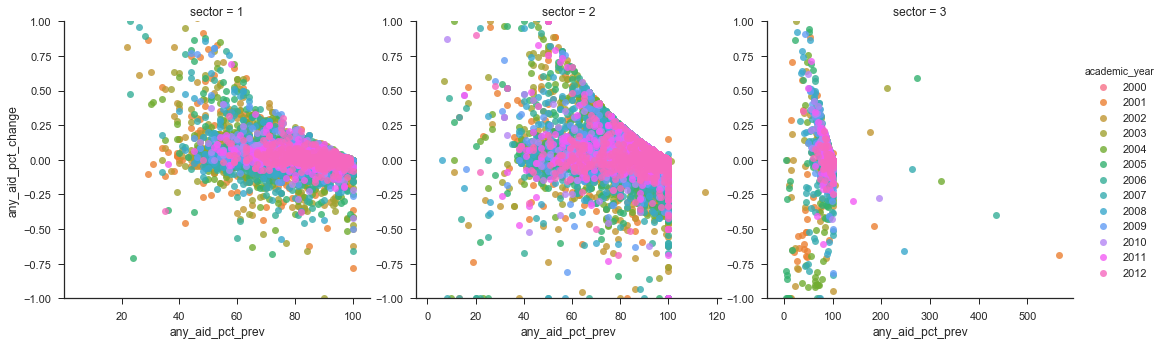

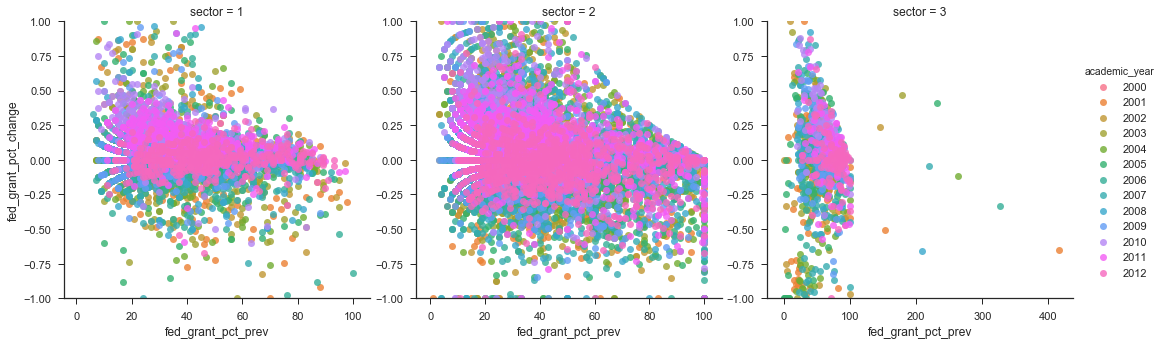

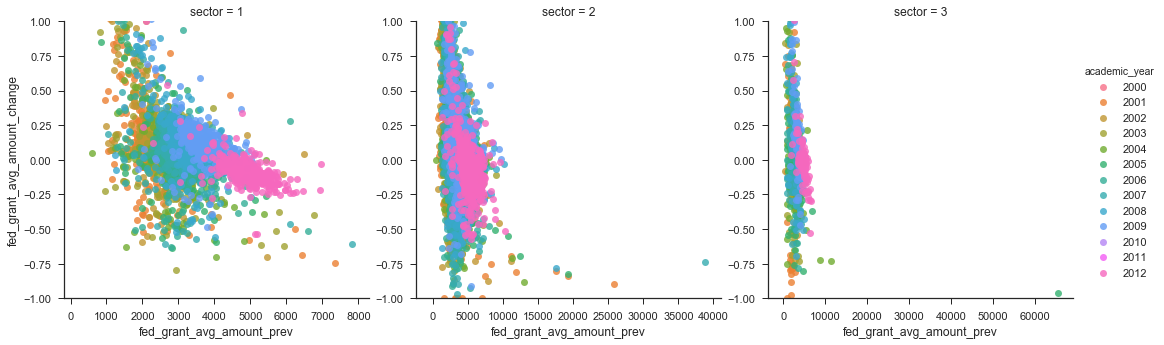

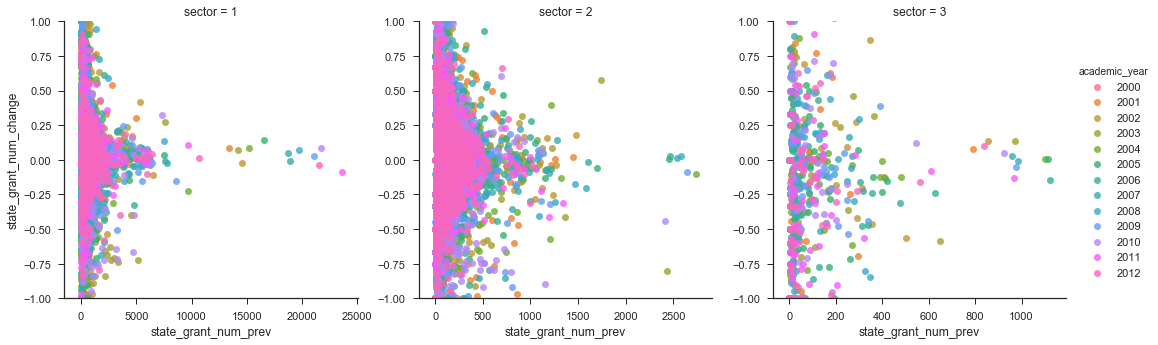

In [ ]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
for c in final_df.columns:
    if final_df[c].dtype in (object, np.int64) or '_prev' in c or '_change' in c: 
        print('skipping {}'.format(c))
        continue
    lm = sns.lmplot('{}_prev'.format(c),
                    '{}_change'.format(c),
                    data = final_df,
                   fit_reg=False,
                   hue = 'academic_year', col='sector', sharex=False)
    lm.axes[0,0].set_ylim([-1,1])
    lm.axes[0,1].set_ylim([-1,1])
    lm.axes[0,2].set_ylim([-1,1])